
# ITI Students Analytics — Simulated Dataset (12,000+ records)

This notebook analyzes a **synthetic** dataset representing students at the *Information Technology Institute (Egypt)* across multiple **tracks** (Data Science, Power BI Development, Data Analysis, Data Engineering, Software Testing, Web Application Development, AI Engineering, Cybersecurity, Cloud Engineering).

It includes KPIs like **attendance, certificates, exams, freelancing income, projects, employment status** and more.

> 📦 Data file: `iti_DATASET.csv`  




## Data Dictionary (selected)

- `student_id`: unique integer id
- `full_name`: student full name (Egyptian)
- `gender`: M/F
- `age`: student age (18–40)
- `governorate`: Egyptian governorate
- `admission_cohort`: monthly cohort start date (2022-01 .. 2025-09)
- `track`: learning track
- `attendance_rate`: [0,1] fraction of sessions attended
- `sessions_attended`, `total_sessions`: detailed attendance
- `exams_score`: 0–100
- `certificates_count`: count of finished certificates
- `certificate_providers`: comma-separated providers when present
- `freelancing_income_usd_total`: total income (log-normal, sparse)
- `freelancing_income_usd_monthly_est`: rough monthly estimate (if freelancing)
- `projects_delivered`: project count during/after program
- `employment_status`: Unemployed/Intern/Freelancer/Part-time/Full-time/Further Study
- `internship_company`: if employed
- `mentor_name`: assigned mentor
- `warnings_count`: disciplinary/attendance warnings
- `dropout_flag`: 1 if dropped out
- `graduated_flag`: 1 if graduated
- `graduation_date`: date if graduated



## Business Questions

1. **Placement & Readiness**
   - Q1: Which **tracks** have the **highest placement** (Intern/Part-time/Full-time)?
   - Q2: What's the **relationship** between **attendance** and **exam scores**?
   - Q3: What **attendance threshold** best predicts **graduation**?

2. **Freelancing & Certifications**
   - Q4: Do **certificates** correlate with **freelancing income**?
   - Q5: Which **certificate providers** are common among **high earners**?

3. **Operations & Quality**
   - Q6: Which cohorts/governorates show **higher dropout** or **warnings**?
   - Q7: **Data quality** check: missing values % per column, duplicate students, outliers.

4. **Program Design**
   - Q8: Are **projects_delivered** a stronger predictor of **employment** than exams?
   - Q9: What is the **optimal track mix** for future cohorts to maximize employment?

5. **KPI Dashboards**
   - Q10: Build quick KPIs: **Graduation Rate**, **Employment Rate**, **Avg Exam**, **Avg Attendance**, **Freelancers %**, **Avg Freelance Income** by track.


## 1. Loading libraries & DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

df = pd.read_csv("ITI_DATASet.csv")
df.head()

,student_id,full_name,gender,age,governorate,admission_cohort,track,attendance_rate,sessions_attended,total_sessions,...,internship_company,mentor_name,email,phone,github_url,linkedin_url,warnings_count,dropout_flag,graduated_flag,graduation_date
0,1,Sara Fouad,F,25,Monufia,2023-03-01,Data Science,0.774,46,60,...,NaN,Dr. Amr,sara.fouad0000@iti.eg,2.001500e+12,https://github.com/sarafouad0000,https://www.linkedin.com/in/sara-fouad-0000/,0,0,1,2023-07-19
1,2,Hany Said,M,26,Monufia,2024-05-01,Software Testing,0.400,24,60,...,Orange,Dr. Heba,NaN,2.001151e+12,https://github.com/hanysaid0001,https://www.linkedin.com/in/hany-said-0001/,1,0,0,NaN
2,3,Mohamed Sami,M,19,Aswan,2022-08-01,Cloud Engineering,0.762,73,96,...,NaN,Eng. Mona,mohamed.sami0002@iti.eg,2.001293e+12,https://github.com/mohamedsami0002,https://www.linkedin.com/in/mohamed-sami-0002/,1,0,1,2023-03-13
3,4,Abdelrahman Farag,M,33,Gharbia,2023-12-01,Data Analysis,0.632,53,84,...,Orange,Eng. Mona,abdelrahman.farag0003@iti.eg,2.001128e+12,https://github.com/abdelrahmanfarag0003,https://www.linkedin.com/in/abdelrahman-farag-...,1,0,1,2024-06-14
4,5,Mohamed Hegazy,M,18,Minya,2023-06-01,Data Science,0.545,46,84,...,Careem,Eng. Mona,mohamed.hegazy0004@iti.eg,2.001142e+12,https://github.com/mohamedhegazy0004,NaN,1,0,0,NaN


## 2. Data Wrangling & Cleaning

In [2]:
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', None)         
pd.set_option('display.max_colwidth', None) 
 
df.head()

,student_id,full_name,gender,age,governorate,admission_cohort,track,attendance_rate,sessions_attended,total_sessions,exams_score,certificates_count,certificate_providers,freelancing_income_usd_total,freelancing_income_usd_monthly_est,projects_delivered,employment_status,internship_company,mentor_name,email,phone,github_url,linkedin_url,warnings_count,dropout_flag,graduated_flag,graduation_date
0,1,Sara Fouad,F,25,Monufia,2023-03-01,Data Science,0.774,46,60,100.0,0,NaN,0.00,0.00,4,Unemployed,NaN,Dr. Amr,sara.fouad0000@iti.eg,2.001500e+12,https://github.com/sarafouad0000,https://www.linkedin.com/in/sara-fouad-0000/,0,0,1,2023-07-19
1,2,Hany Said,M,26,Monufia,2024-05-01,Software Testing,0.400,24,60,72.6,0,NaN,0.00,0.00,3,Intern,Orange,Dr. Heba,NaN,2.001151e+12,https://github.com/hanysaid0001,https://www.linkedin.com/in/hany-said-0001/,1,0,0,NaN
2,3,Mohamed Sami,M,19,Aswan,2022-08-01,Cloud Engineering,0.762,73,96,83.0,0,NaN,43.31,21.66,3,Freelancer,NaN,Eng. Mona,mohamed.sami0002@iti.eg,2.001293e+12,https://github.com/mohamedsami0002,https://www.linkedin.com/in/mohamed-sami-0002/,1,0,1,2023-03-13
3,4,Abdelrahman Farag,M,33,Gharbia,2023-12-01,Data Analysis,0.632,53,84,75.7,0,NaN,0.00,0.00,4,Full-time,Orange,Eng. Mona,abdelrahman.farag0003@iti.eg,2.001128e+12,https://github.com/abdelrahmanfarag0003,https://www.linkedin.com/in/abdelrahman-farag-0003/,1,0,1,2024-06-14
4,5,Mohamed Hegazy,M,18,Minya,2023-06-01,Data Science,0.545,46,84,77.4,0,NaN,14.52,1.81,1,Full-time,Careem,Eng. Mona,mohamed.hegazy0004@iti.eg,2.001142e+12,https://github.com/mohamedhegazy0004,NaN,1,0,0,NaN


In [3]:
df.drop(["email","phone","github_url","linkedin_url",'full_name','admission_cohort','graduation_date'],axis=1,inplace=True)
df.replace({'F': 'Female', 'M': 'Male','Web Application Development':'Web Application','Power BI Development':'Power BI'}, inplace=True)

In [4]:
df.shape

(12000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   student_id                          12000 non-null  int64  
 1   gender                              12000 non-null  object 
 2   age                                 12000 non-null  int64  
 3   governorate                         12000 non-null  object 
 4   track                               12000 non-null  object 
 5   attendance_rate                     12000 non-null  float64
 6   sessions_attended                   12000 non-null  int64  
 7   total_sessions                      12000 non-null  int64  
 8   exams_score                         12000 non-null  float64
 9   certificates_count                  12000 non-null  int64  
 10  certificate_providers               7710 non-null   object 
 11  freelancing_income_usd_total        12000

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

student_id                               0
gender                                   0
age                                      0
governorate                              0
track                                    0
attendance_rate                          0
sessions_attended                        0
total_sessions                           0
exams_score                              0
certificates_count                       0
certificate_providers                 4290
freelancing_income_usd_total             0
freelancing_income_usd_monthly_est       0
projects_delivered                       0
employment_status                        0
internship_company                    3935
mentor_name                              0
warnings_count                           0
dropout_flag                             0
graduated_flag                           0
dtype: int64

In [8]:
df.head()

,student_id,gender,age,governorate,track,attendance_rate,sessions_attended,total_sessions,exams_score,certificates_count,certificate_providers,freelancing_income_usd_total,freelancing_income_usd_monthly_est,projects_delivered,employment_status,internship_company,mentor_name,warnings_count,dropout_flag,graduated_flag
0,1,Female,25,Monufia,Data Science,0.774,46,60,100.0,0,NaN,0.00,0.00,4,Unemployed,NaN,Dr. Amr,0,0,1
1,2,Male,26,Monufia,Software Testing,0.400,24,60,72.6,0,NaN,0.00,0.00,3,Intern,Orange,Dr. Heba,1,0,0
2,3,Male,19,Aswan,Cloud Engineering,0.762,73,96,83.0,0,NaN,43.31,21.66,3,Freelancer,NaN,Eng. Mona,1,0,1
3,4,Male,33,Gharbia,Data Analysis,0.632,53,84,75.7,0,NaN,0.00,0.00,4,Full-time,Orange,Eng. Mona,1,0,1
4,5,Male,18,Minya,Data Science,0.545,46,84,77.4,0,NaN,14.52,1.81,1,Full-time,Careem,Eng. Mona,1,0,0


## 4. Exploratory Data Analysis (EDA)

In [9]:
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
student_id,12000.0,6000.500000,3464.245950,1.0,3000.750,6000.500,9000.25,12000.000
age,12000.0,23.579083,3.318784,18.0,21.000,23.000,26.00,36.000
attendance_rate,12000.0,0.614146,0.142646,0.4,0.492,0.621,0.73,0.978
sessions_attended,12000.0,47.869417,13.854459,24.0,38.000,46.000,58.00,89.000
total_sessions,12000.0,77.999000,13.476763,60.0,60.000,72.000,96.00,96.000
exams_score,12000.0,85.126970,9.818918,44.6,78.300,85.600,92.70,100.000
certificates_count,12000.0,1.253500,1.208798,0.0,0.000,1.000,2.00,8.000
freelancing_income_usd_total,12000.0,6.821129,13.864758,0.0,0.000,0.000,10.38,473.040
freelancing_income_usd_monthly_est,12000.0,2.051987,5.380407,0.0,0.000,0.000,1.91,96.170
projects_delivered,12000.0,3.845417,2.010810,0.0,2.000,4.000,5.00,15.000


### 4.1 - Q1: Which **tracks** have the **highest placement** (Intern/Part-time/Full-time)?

In [10]:
modified_df = df.copy()
modified_df['employment_status'].replace({'Freelancer':'Employed','Intern':'Employed','Part-time':'Employed','Further Study':'Unemployed','Full-time':'Employed'}, inplace=True)
modified_df.head()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_28688\2473502462.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  modified_df['employment_status'].replace({'Freelancer':'Employed','Intern':'Employed','Part-time':'Employed','Further Study':'Unemployed','Full-time':'Employed'}, inplace=True)


,student_id,gender,age,governorate,track,attendance_rate,sessions_attended,total_sessions,exams_score,certificates_count,certificate_providers,freelancing_income_usd_total,freelancing_income_usd_monthly_est,projects_delivered,employment_status,internship_company,mentor_name,warnings_count,dropout_flag,graduated_flag
0,1,Female,25,Monufia,Data Science,0.774,46,60,100.0,0,NaN,0.00,0.00,4,Unemployed,NaN,Dr. Amr,0,0,1
1,2,Male,26,Monufia,Software Testing,0.400,24,60,72.6,0,NaN,0.00,0.00,3,Employed,Orange,Dr. Heba,1,0,0
2,3,Male,19,Aswan,Cloud Engineering,0.762,73,96,83.0,0,NaN,43.31,21.66,3,Employed,NaN,Eng. Mona,1,0,1
3,4,Male,33,Gharbia,Data Analysis,0.632,53,84,75.7,0,NaN,0.00,0.00,4,Employed,Orange,Eng. Mona,1,0,1
4,5,Male,18,Minya,Data Science,0.545,46,84,77.4,0,NaN,14.52,1.81,1,Employed,Careem,Eng. Mona,1,0,0


In [11]:
Tracks = pd.pivot_table(data=modified_df,index='track',columns='employment_status',values='student_id',aggfunc='count')
Tracks = Tracks.sort_values('Employed', ascending=False)
Tracks.head(len(Tracks))

employment_status,Employed,Unemployed
track,,
Data Science,1676,440
Web Application,1562,372
Data Engineering,1315,345
Data Analysis,1309,316
Software Testing,987,237
Power BI,952,260
AI Engineering,740,187
Cloud Engineering,525,116
Cybersecurity,523,138


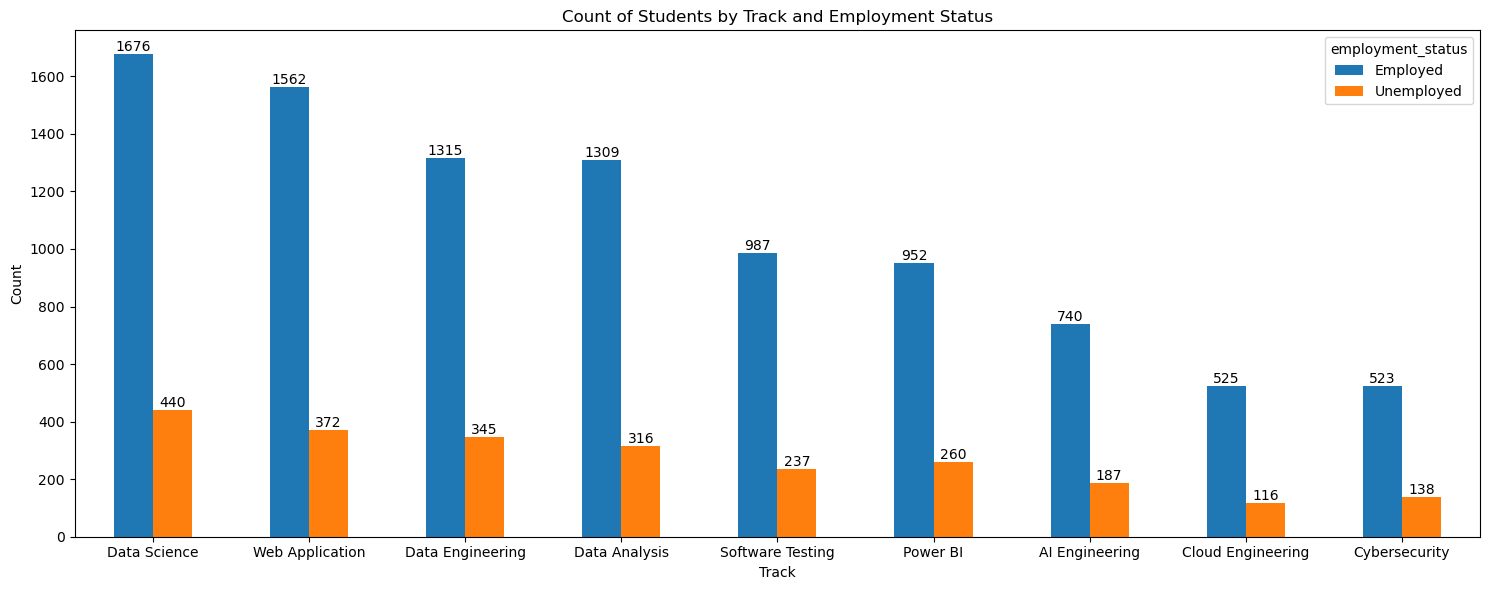

In [12]:
fig = Tracks.plot.bar(figsize=(15, 6))
plt.title('Count of Students by Track and Employment Status')
plt.xlabel('Track')
plt.ylabel('Count')
for cont in fig.containers:
    fig.bar_label(cont)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 1- From the above Figure we found out that **Track Students** get  **Employed** the most Around **1700 Student** in **Data Science**.
- 2- the most track for **Hired Students** are in  **Data Science** Followed by **Web** and **Data Analysis** Respectively.
- 3- the **lowest** Form of **unemployment** are in **Cloud Engineering** Track while **the Highest** at  **Data Science** Track.

### 4.2 - Q2: Investegate **Gender** Reletive to **tracks** ?

In [13]:
gender = pd.pivot_table(data=df,index='gender',values='student_id',aggfunc='count')
gender.head(len(gender))

,student_id
gender,
Female,4815
Male,7185


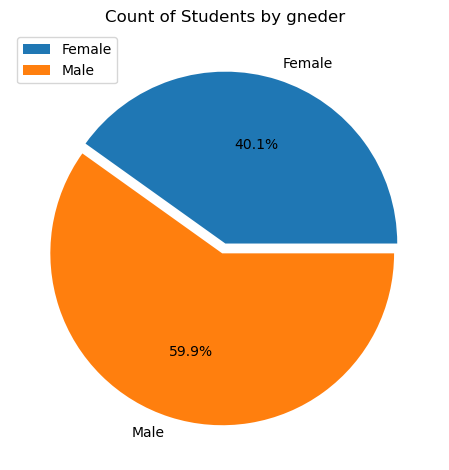

In [14]:
explode = (0.01, 0.05)
plt.pie(data=gender,x='student_id',labels=gender.index,autopct='%1.1f%%',explode=explode)
plt.title('Count of Students by gneder')
plt.tight_layout()
plt.legend(gender.index)
plt.show()

- From this **Pie Chart** We found out that **60%** of **ITI Students** are **Male** and **40%** are **Females**

In [15]:
tracks_by_gender = pd.pivot_table(data=df,index='track',columns='gender',values='student_id',aggfunc='count')
tracks_by_gender = tracks_by_gender.sort_values('Male',ascending=True)
tracks_by_gender.head(10)

gender,Female,Male
track,,
Cloud Engineering,257,384
Cybersecurity,260,401
AI Engineering,381,546
Power BI,507,705
Software Testing,466,758
Data Analysis,685,940
Data Engineering,652,1008
Web Application,754,1180
Data Science,853,1263


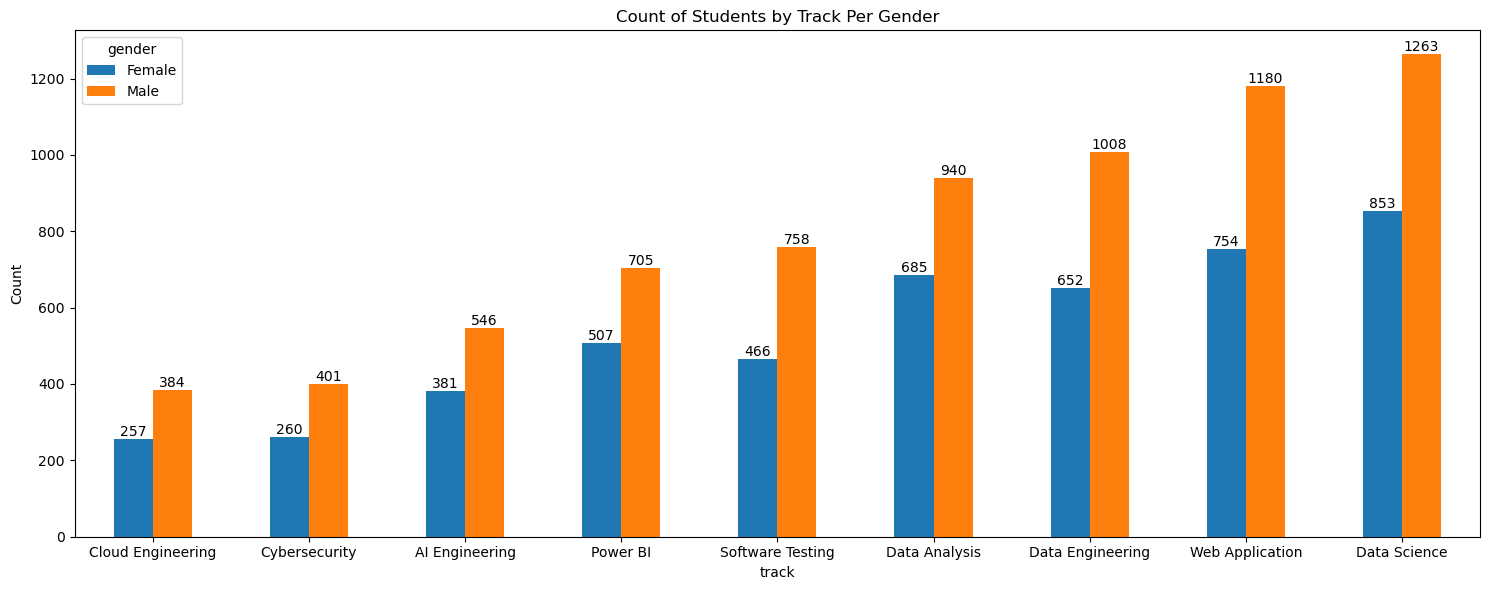

In [16]:
fig = tracks_by_gender.plot.bar(figsize=(15, 6))
plt.title('Count of Students by Track Per Gender')
plt.xlabel('track')
plt.ylabel('Count')
plt.xticks(rotation=0)

for cont in fig.containers:
    fig.bar_label(cont)

plt.tight_layout()
plt.show()

- In each **Track** we found out that there's a **majority** of the classes had a **Male** Students

### 4.3 - Q3: What's the **relationship** between **attendance** and **exam scores**?

<Axes: >

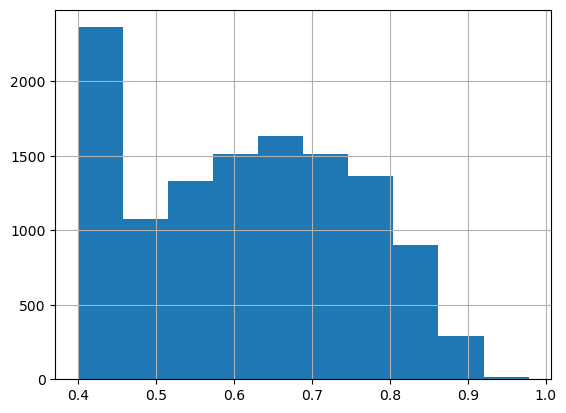

In [17]:
df['attendance_rate'].hist()

- Looks like the **Attendance Rate** is right skewed and that results that we expect **50%** of  **ITI Students** attend near **60%** of the Sessions and that rate tends to **Decline** towards **100%** of the Attendance Rate.  

<Axes: >

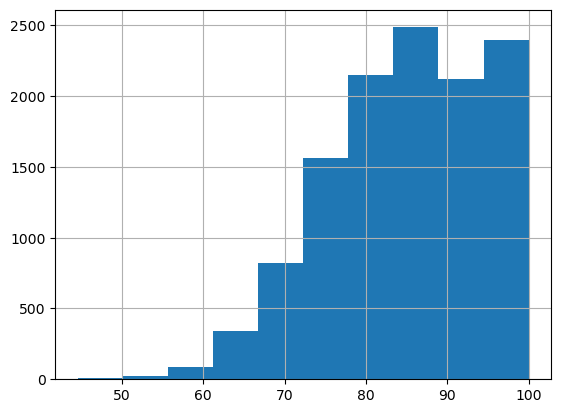

In [18]:
df['exams_score'].hist()

- Looks like the **Exams Score** is left Skewed and that **50%** of **ITI Students** Gets **85%** in Exams in parallel of the information we got that **85%** of **Students** attend near **60%** of the Sessions.

In [19]:
Exam_Vs_Attendance= df[['exams_score','attendance_rate']]
round(Exam_Vs_Attendance.corr(),2)

,exams_score,attendance_rate
exams_score,1.00,0.33
attendance_rate,0.33,1.00


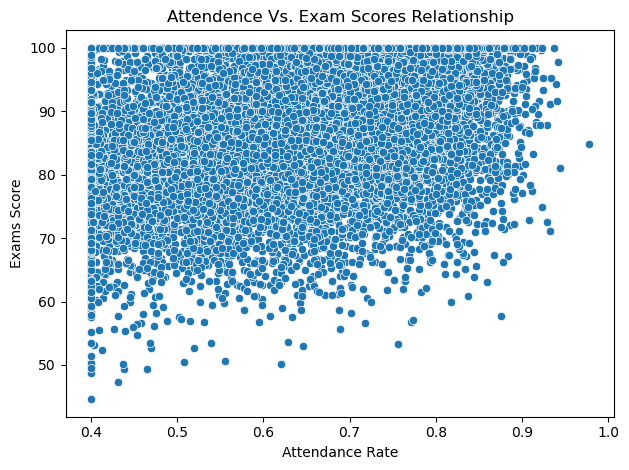

In [20]:
sns.scatterplot(data=df,x=df['attendance_rate'],y=df['exams_score'])
plt.title('Attendence Vs. Exam Scores Relationship')
plt.xlabel('Attendance Rate')
plt.ylabel('Exams Score')
plt.tight_layout()
plt.show()

- from the Figure above we found that there's not direct relationship **Between Attandence Rate & Exam Scores**
- Most Students Get **High Exam Scores** irrelevant of their **Attendance Rate** but **the lowest Exam Scores** Happens at the **Lowest Attendance Rate**.  

### 4.4 - Q4: What's the **Graduation Rate** for each **Gender**?

In [21]:
grad_rate = round(df['graduated_flag'].sum() * 100 / df['graduated_flag'].count(),1)
grad_rate

np.float64(48.8)

In [22]:
grad_gend = pd.pivot_table(data=df,index='gender',columns='graduated_flag',values='student_id',aggfunc='count')
grad_gend = round(grad_gend.div(grad_gend.sum(axis=1),axis=0) * 100,1)
grad_gend

graduated_flag,0,1
gender,,
Female,50.7,49.3
Male,51.5,48.5


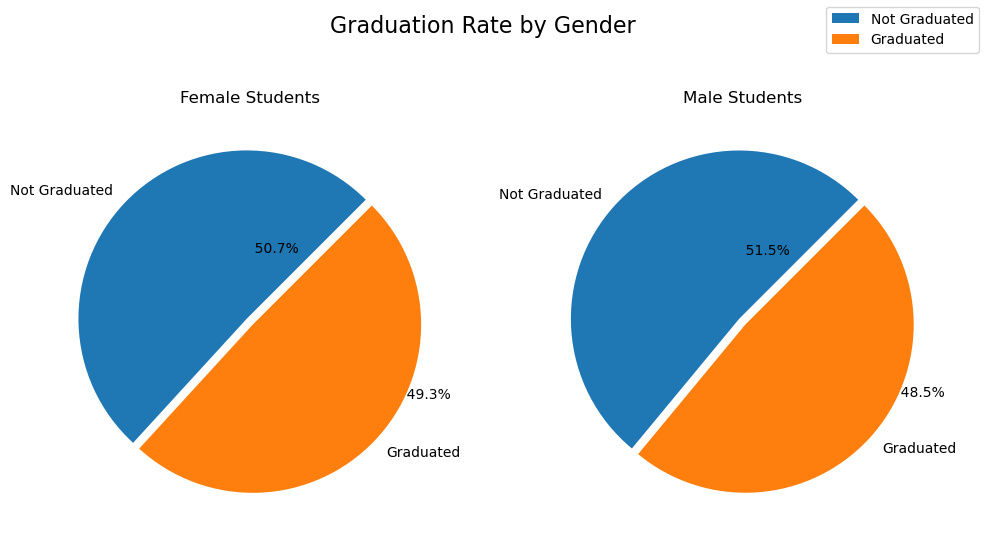

In [23]:
fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

ax[0].pie(x=grad_gend.loc['Female'],labels=['Not Graduated','Graduated'],autopct='%51.1f%%',explode=(0.025,0.025),startangle=45)
ax[1].pie(x=grad_gend.loc['Male'],labels=['Not Graduated','Graduated'],autopct='%51.1f%%',explode=(0.025,0.025),startangle=45)
ax[0].set_title('Female Students')
ax[1].set_title('Male Students')

fig.suptitle('Graduation Rate by Gender', fontsize=16)

fig.legend(['Not Graduated', 'Graduated'], loc='upper right')

plt.tight_layout()
plt.show()

- after investegation we could concluod that :-
-    1- **Graduation rate** is not affected by **gender**. 
 -   2- **Graduation rate** is mostly the same when considering the gender or not as total **Graduation rate** is **%48.8** and for **Males** is **%48.5%** and for **Females** is **49.3%**.

### 4.5 - Q5: Which cohorts/governorates show **higher dropout** and **warnings**?

In [24]:
Drop_out = pd.pivot_table(data=df,index='governorate',columns='dropout_flag',values='student_id',aggfunc='count')
Drop_out.rename(columns={0: 'Stayed', 1: 'Dropped Out'}, inplace=True)
Drop_out['Dropped Out'] = Drop_out['Dropped Out'].fillna(0, inplace=True)
Drop_out.head(len(Drop_out))

C:\Users\ibrah\AppData\Local\Temp\ipykernel_28688\2962313544.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Drop_out['Dropped Out'] = Drop_out['Dropped Out'].fillna(0, inplace=True)


dropout_flag,Stayed,Dropped Out
governorate,,
Alexandria,516.0,None
Assiut,512.0,None
Aswan,530.0,None
Beheira,567.0,None
Beni Suef,546.0,None
Cairo,583.0,None
Dakahlia,514.0,None
Fayoum,562.0,None
Gharbia,559.0,None


### 4.5 - Q5: Which is a stronger predictor of **Graduation** ?

In [25]:
copied = df.copy()
copied['employment_status'].replace({'Freelancer':'Employed','Intern':'Employed','Part-time':'Employed','Further Study':'Unemployed','Full-time':'Employed'}, inplace=True)
maping = {'Employed':1,'Unemployed':0}
copied['employment_status'] = copied['employment_status'].map(maping).astype(int)
copied.head()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_28688\2027848153.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copied['employment_status'].replace({'Freelancer':'Employed','Intern':'Employed','Part-time':'Employed','Further Study':'Unemployed','Full-time':'Employed'}, inplace=True)


,student_id,gender,age,governorate,track,attendance_rate,sessions_attended,total_sessions,exams_score,certificates_count,certificate_providers,freelancing_income_usd_total,freelancing_income_usd_monthly_est,projects_delivered,employment_status,internship_company,mentor_name,warnings_count,dropout_flag,graduated_flag
0,1,Female,25,Monufia,Data Science,0.774,46,60,100.0,0,NaN,0.00,0.00,4,0,NaN,Dr. Amr,0,0,1
1,2,Male,26,Monufia,Software Testing,0.400,24,60,72.6,0,NaN,0.00,0.00,3,1,Orange,Dr. Heba,1,0,0
2,3,Male,19,Aswan,Cloud Engineering,0.762,73,96,83.0,0,NaN,43.31,21.66,3,1,NaN,Eng. Mona,1,0,1
3,4,Male,33,Gharbia,Data Analysis,0.632,53,84,75.7,0,NaN,0.00,0.00,4,1,Orange,Eng. Mona,1,0,1
4,5,Male,18,Minya,Data Science,0.545,46,84,77.4,0,NaN,14.52,1.81,1,1,Careem,Eng. Mona,1,0,0


In [26]:
for i in copied.columns:
    if copied[i].dtype == 'object' :
        copied.drop(i,axis=1,inplace=True)
copied.head()

,student_id,age,attendance_rate,sessions_attended,total_sessions,exams_score,certificates_count,freelancing_income_usd_total,freelancing_income_usd_monthly_est,projects_delivered,employment_status,warnings_count,dropout_flag,graduated_flag
0,1,25,0.774,46,60,100.0,0,0.00,0.00,4,0,0,0,1
1,2,26,0.400,24,60,72.6,0,0.00,0.00,3,1,1,0,0
2,3,19,0.762,73,96,83.0,0,43.31,21.66,3,1,1,0,1
3,4,33,0.632,53,84,75.7,0,0.00,0.00,4,1,1,0,1
4,5,18,0.545,46,84,77.4,0,14.52,1.81,1,1,1,0,0


In [48]:
correlations = abs(round(copied.corr(),2))
correlations.head()

,student_id,age,attendance_rate,sessions_attended,total_sessions,exams_score,certificates_count,freelancing_income_usd_total,freelancing_income_usd_monthly_est,projects_delivered,employment_status,warnings_count,dropout_flag,graduated_flag
student_id,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00
age,0.00,1.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.00
attendance_rate,0.01,0.01,1.00,0.79,0.02,0.33,0.35,0.05,0.04,0.21,0.01,0.42,0.04,0.75
sessions_attended,0.01,0.01,0.79,1.00,0.58,0.26,0.28,0.04,0.03,0.17,0.01,0.33,0.03,0.59
total_sessions,0.01,0.00,0.02,0.58,1.00,0.02,0.02,0.01,0.01,0.00,0.00,0.01,0.00,0.02


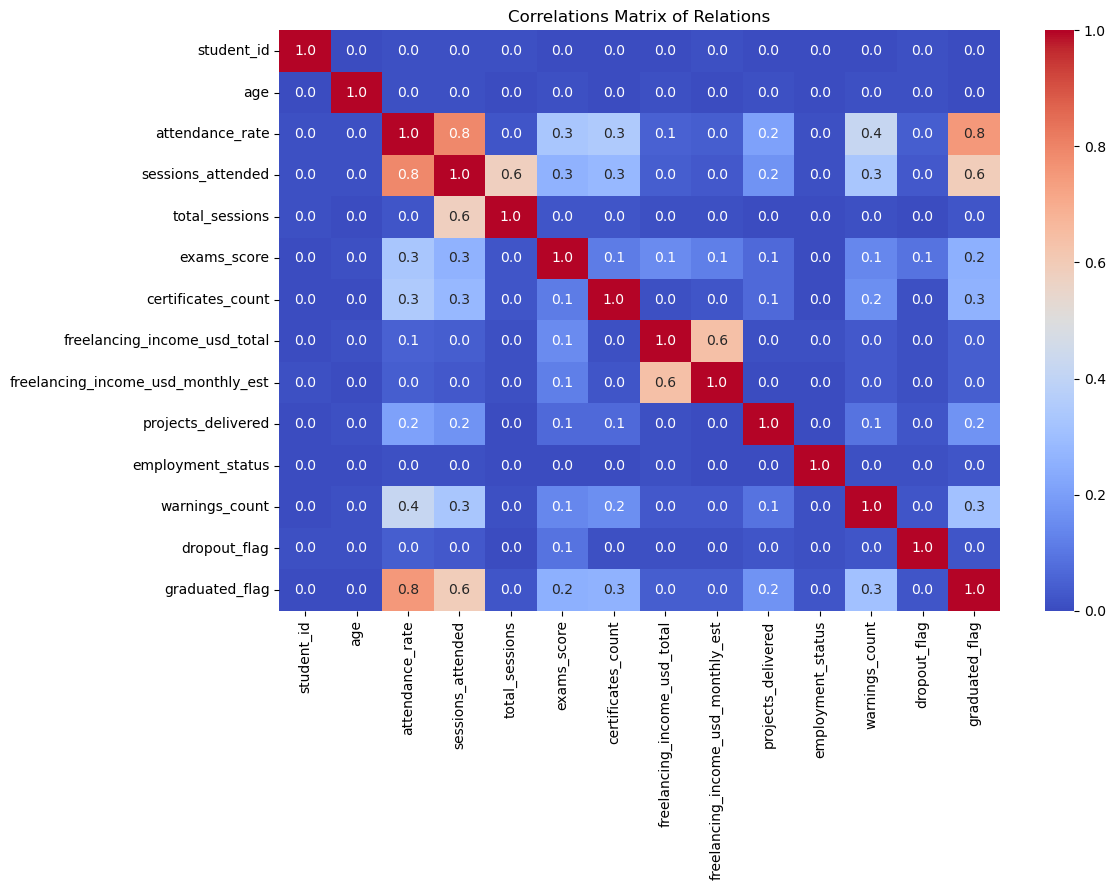

In [49]:
plt.figure(figsize=(12,9))
sns.heatmap(data=correlations,annot=True,fmt=".1f",cmap='coolwarm')
plt.title("Correlations Matrix of Relations",loc='center')
plt.tight_layout()
plt.show()

- 1- from the figure above we found out the **relationships** between the different factors like **Graduation**.
- 2- the **Strongest Predictor** for whether or not a student is **Graduated** is the **Attendance Rate** at **0.75** and **Sessions Attended** at **0.59**.

In [65]:
corr = correlations.graduated_flag.sort_values(ascending=False)
corr = corr.drop('graduated_flag')
corr_df = corr.reset_index()
corr_df.columns = ['Factors', 'graduation']
corr_df.head()

,Factors,graduation
0,attendance_rate,0.75
1,sessions_attended,0.59
2,warnings_count,0.31
3,certificates_count,0.26
4,exams_score,0.25


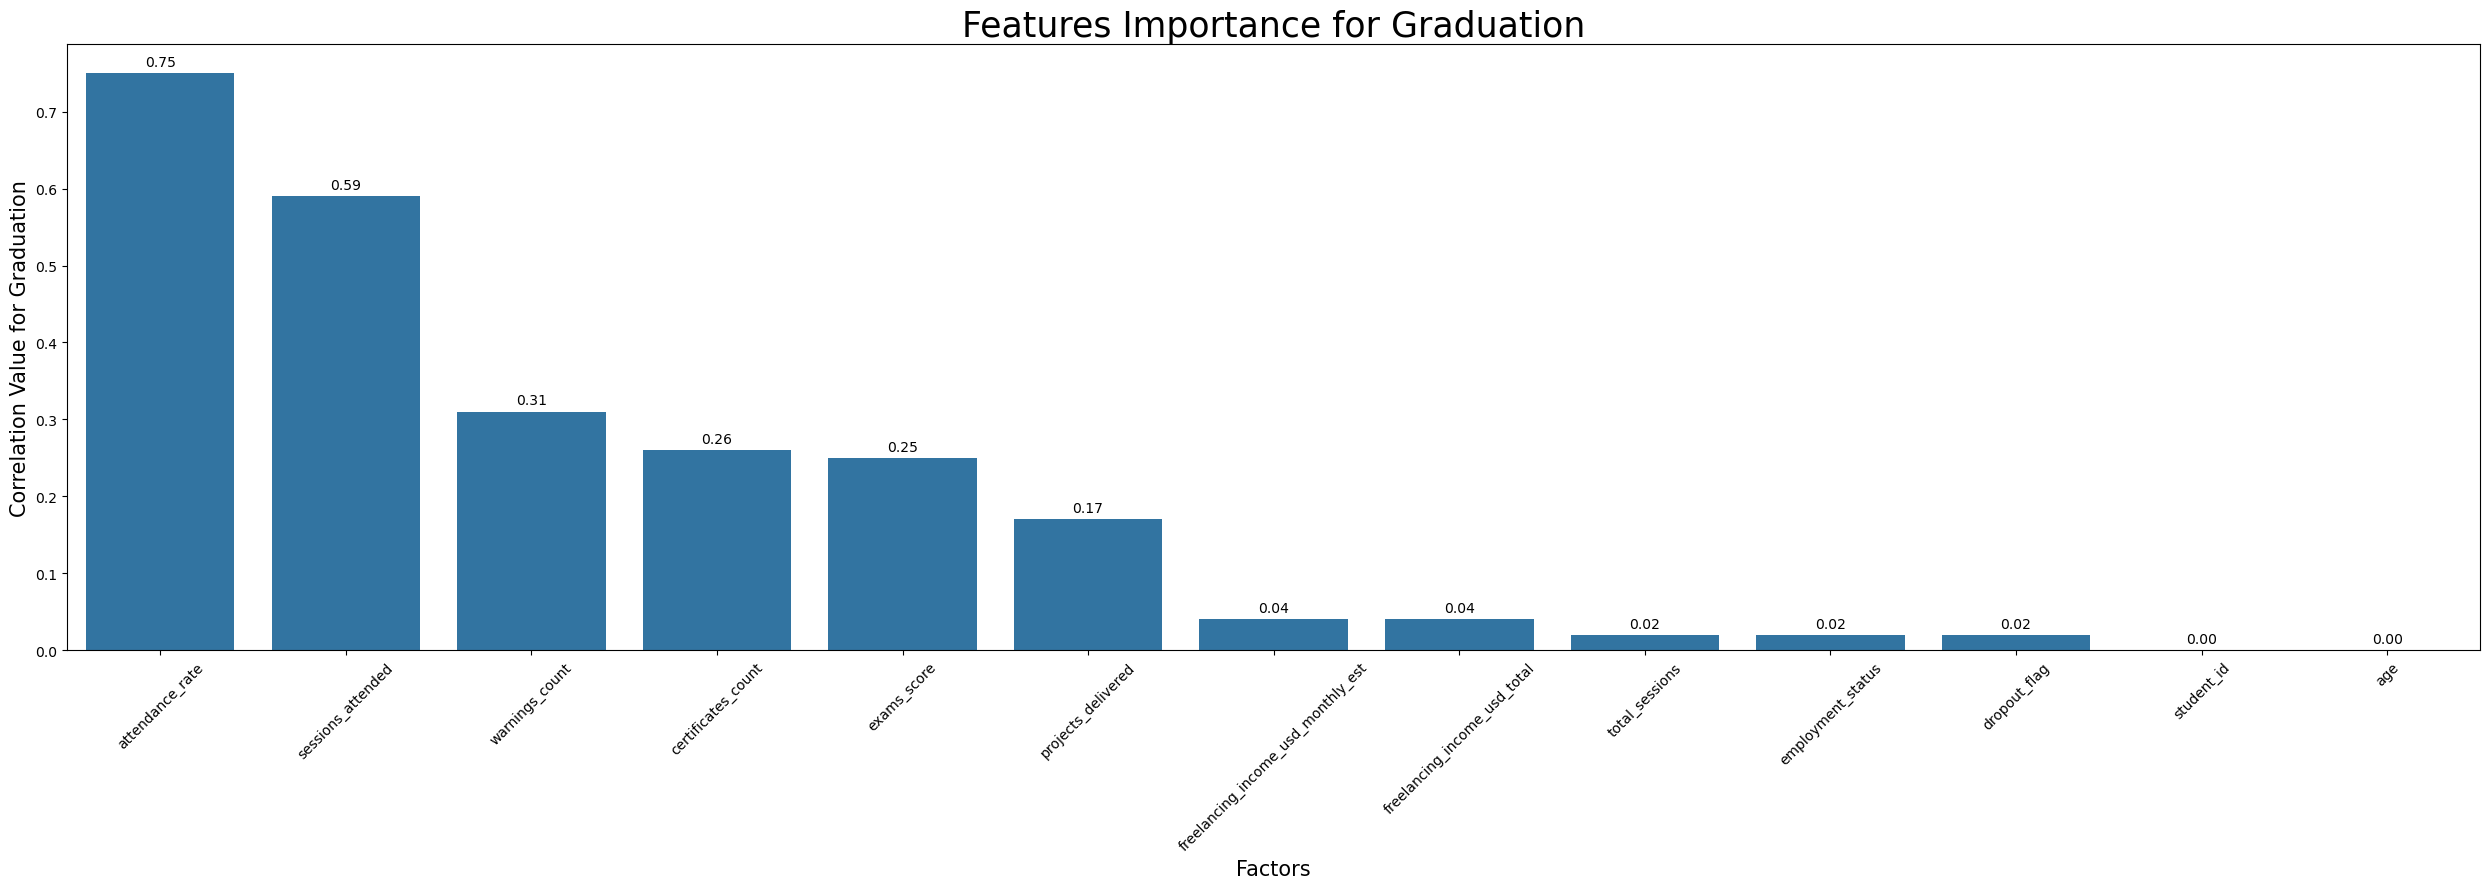

In [66]:
fig, ax = plt.subplots(figsize=(25, 9))

sns.barplot(x='Factors', y='graduation', data=corr_df, ax=ax)

for cont in ax.containers:
    ax.bar_label(cont,fmt='%.2f', padding=3)
    
plt.title('Features Importance for Graduation', fontsize=25)
plt.ylabel("Correlation Value for Graduation", fontsize=15)
plt.xlabel("Factors", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()